# __0. Libraries__

In [4]:
#Libraries

    #Exploratory Data Analysis (EDA)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib as mpl # data visualization
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization ("pyplot module", a.k.a. "plt")

    #Each "pyplot" function makes some change to a figure: e.g., creates a figure, creates a...
    #...plotting area in a figure, plots some lines in a plotting area, decorates the plot with...
    #...labels, etc. The various plots we can utilize using Pyplot are Line Plot, Histogram, Scatter,...
    #...3D Plot, Image, Contour, and Polar.

    #Prepare the Data (PD)
from sklearn.impute import SimpleImputer # completing/replacing missing values    

    #Binary Classifier
#from sklearn.linear_model import SGDClassifier # Machine Learning Model (Linear Classification)
#from sklearn.model_selection import cross_val_predict #Generating predictions from the Training Set

    #Performance Measures used on Classification Models
#from sklearn.metrics import classification_report #Classification Report (Confusion Matrix, Precision score, Recall score, and F1 Score)
#from sklearn.metrics import confusion_matrix #Performance Measure (Confusion Matrix)
#from sklearn.metrics import ConfusionMatrixDisplay #Performance Measure (Plot Confusion Matrix)

#from sklearn.metrics import precision_score, recall_score #Performance Measure (Precision and Recall Score)
#from sklearn.metrics import f1_score #Performance Measure (F1 Score)
#from sklearn.metrics import precision_recall_curve #Performance Measure (Precision Recall Curve)
#from sklearn.metrics import roc_curve #Performance Measure (ROC Curve)
#from sklearn.metrics import roc_auc_score #Performance Measure (ROC Curve AUC Score)

    #Multiclass Classification
#from sklearn.svm import SVC #Support Vector Classification (from Support Vector Machines)
#from sklearn.multiclass import OneVsRestClassifier #One-vs-the-rest (OvR) multiclass classifier


# __1. Important__

Type of machine learning system to build:

1. Supervised Learning: __Binary Classification using Support Vector Machine (SVM) Model__
2. Batch Learning (also called "offline learning")
3. Model-based learning

__Goal__:

1. __For each "id" in the test set, we must predict the probability of a "Machine failure"__.

2. __Metric__: This competition is evaluated on area under the ROC curve between the predicted probability and the observed target..

# __2. Loading the Data - Training Dataset__

In [8]:
#Training Set
training_data = pd.read_csv("/kaggle/input/playground-series-s3e17/train.csv")

#Training Set (only "metric variables = quantitative variables")
training_data_metric = training_data.select_dtypes(include=['int64',"float64"]) 

#Training Set (only "non-metric variables = categorical variables")
training_data_nonmetric = training_data.select_dtypes(include=["object"])

# __3. Exploratory Data Analysis (EDA) - Training Dataset__


  Shape of the dataframe:  (136429, 14) 

  Head of the dataframe:  

   id Product ID Type  Air temperature [K]  Process temperature [K]  \
0   0     L50096    L                300.6                    309.6   
1   1     M20343    M                302.6                    312.1   
2   2     L49454    L                299.3                    308.5   
3   3     L53355    L                301.0                    310.9   
4   4     M24050    M                298.0                    309.0   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1596         36.1              140                0    0   
1                    1759         29.1              200                0    0   
2                    1805         26.5               25                0    0   
3                    1524         44.3              197                0    0   
4                    1641         35.4               34                0    0   

   HDF  PWF  OS

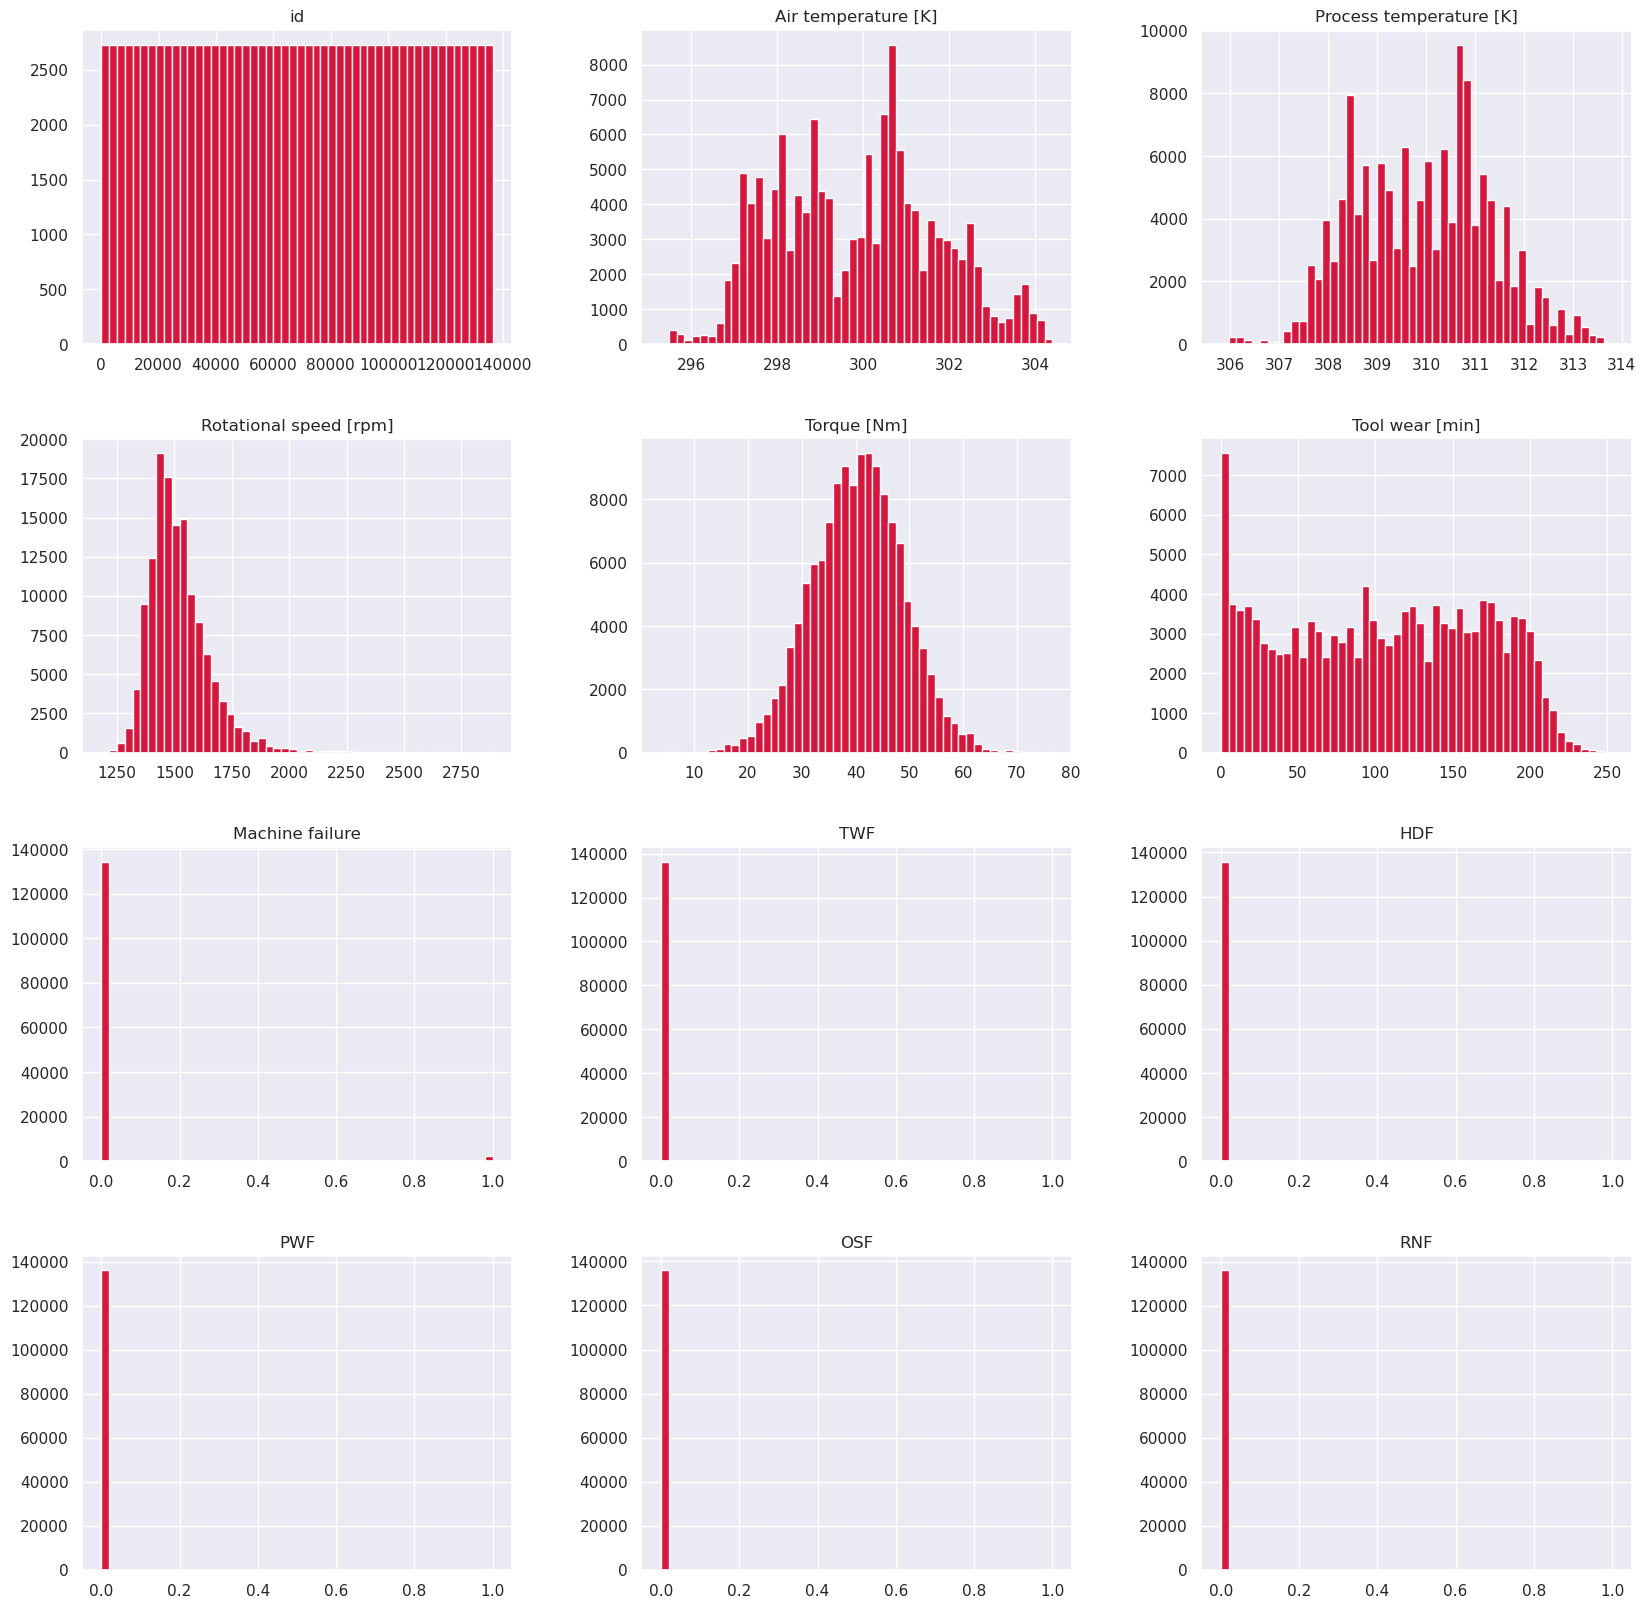


  Boxplots of metric variables of the dataframe: 



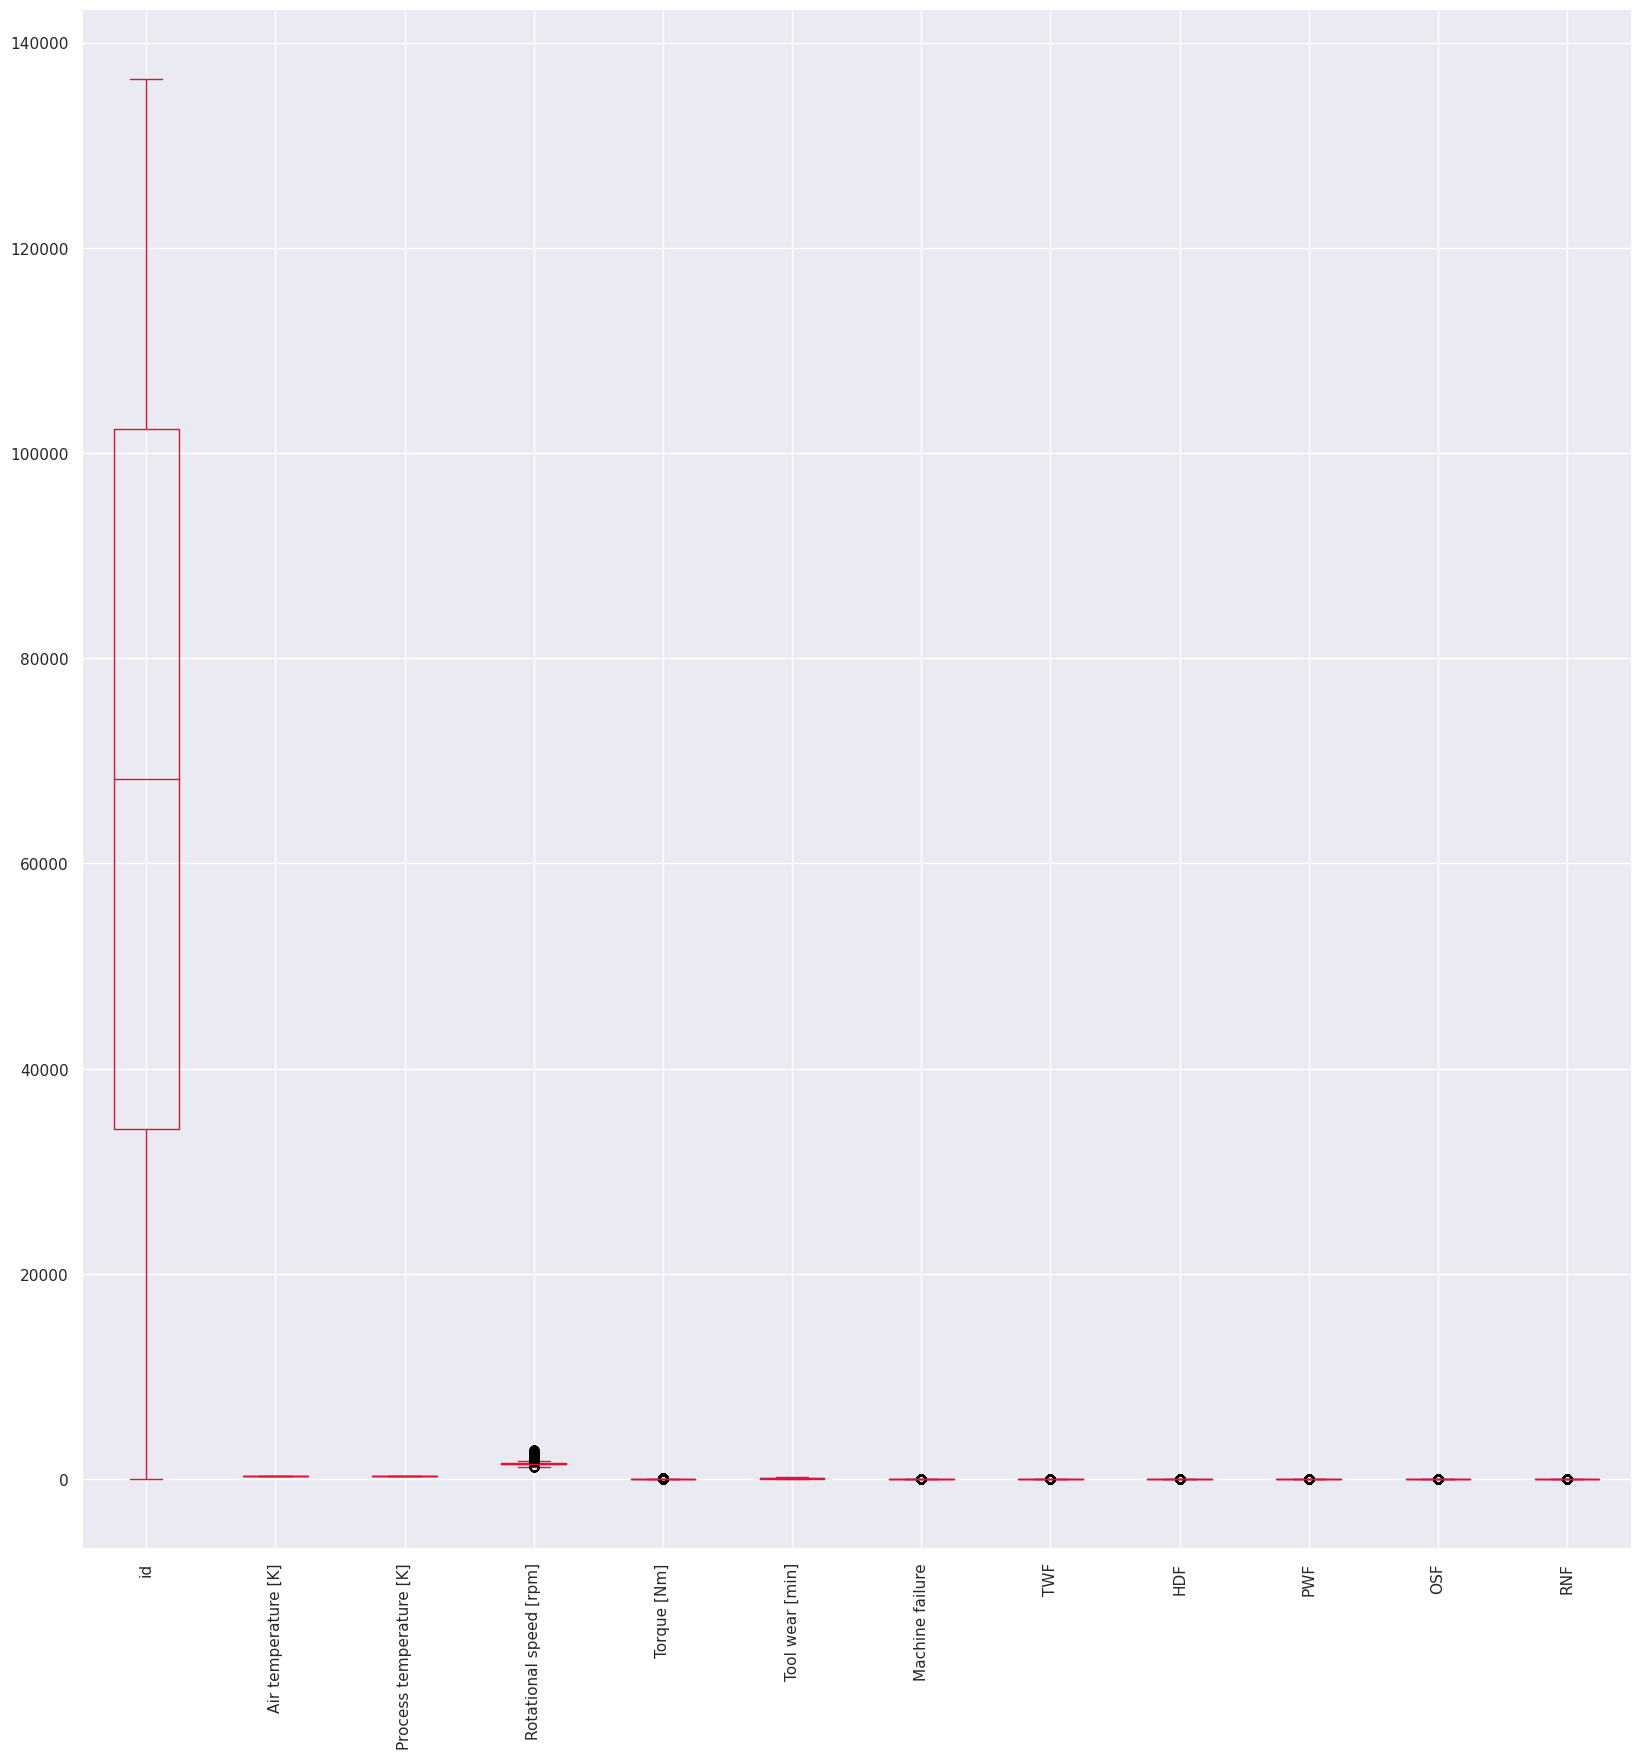


  Standard Correlation Coefficient of metric variables of the dataframe (bivariate): 

                               id  Air temperature [K]  \
id                       1.000000            -0.005338   
Air temperature [K]     -0.005338             1.000000   
Process temperature [K] -0.002396             0.856080   
Rotational speed [rpm]   0.004419             0.016545   
Torque [Nm]             -0.001968            -0.006773   
Tool wear [min]         -0.001790             0.016994   
Machine failure          0.001500             0.067744   
TWF                     -0.000475             0.003826   
HDF                     -0.000680             0.100454   
PWF                      0.003275             0.007967   
OSF                      0.002114             0.007842   
RNF                      0.000175             0.004815   

                         Process temperature [K]  Rotational speed [rpm]  \
id                                     -0.002396                0.004419   
Air t

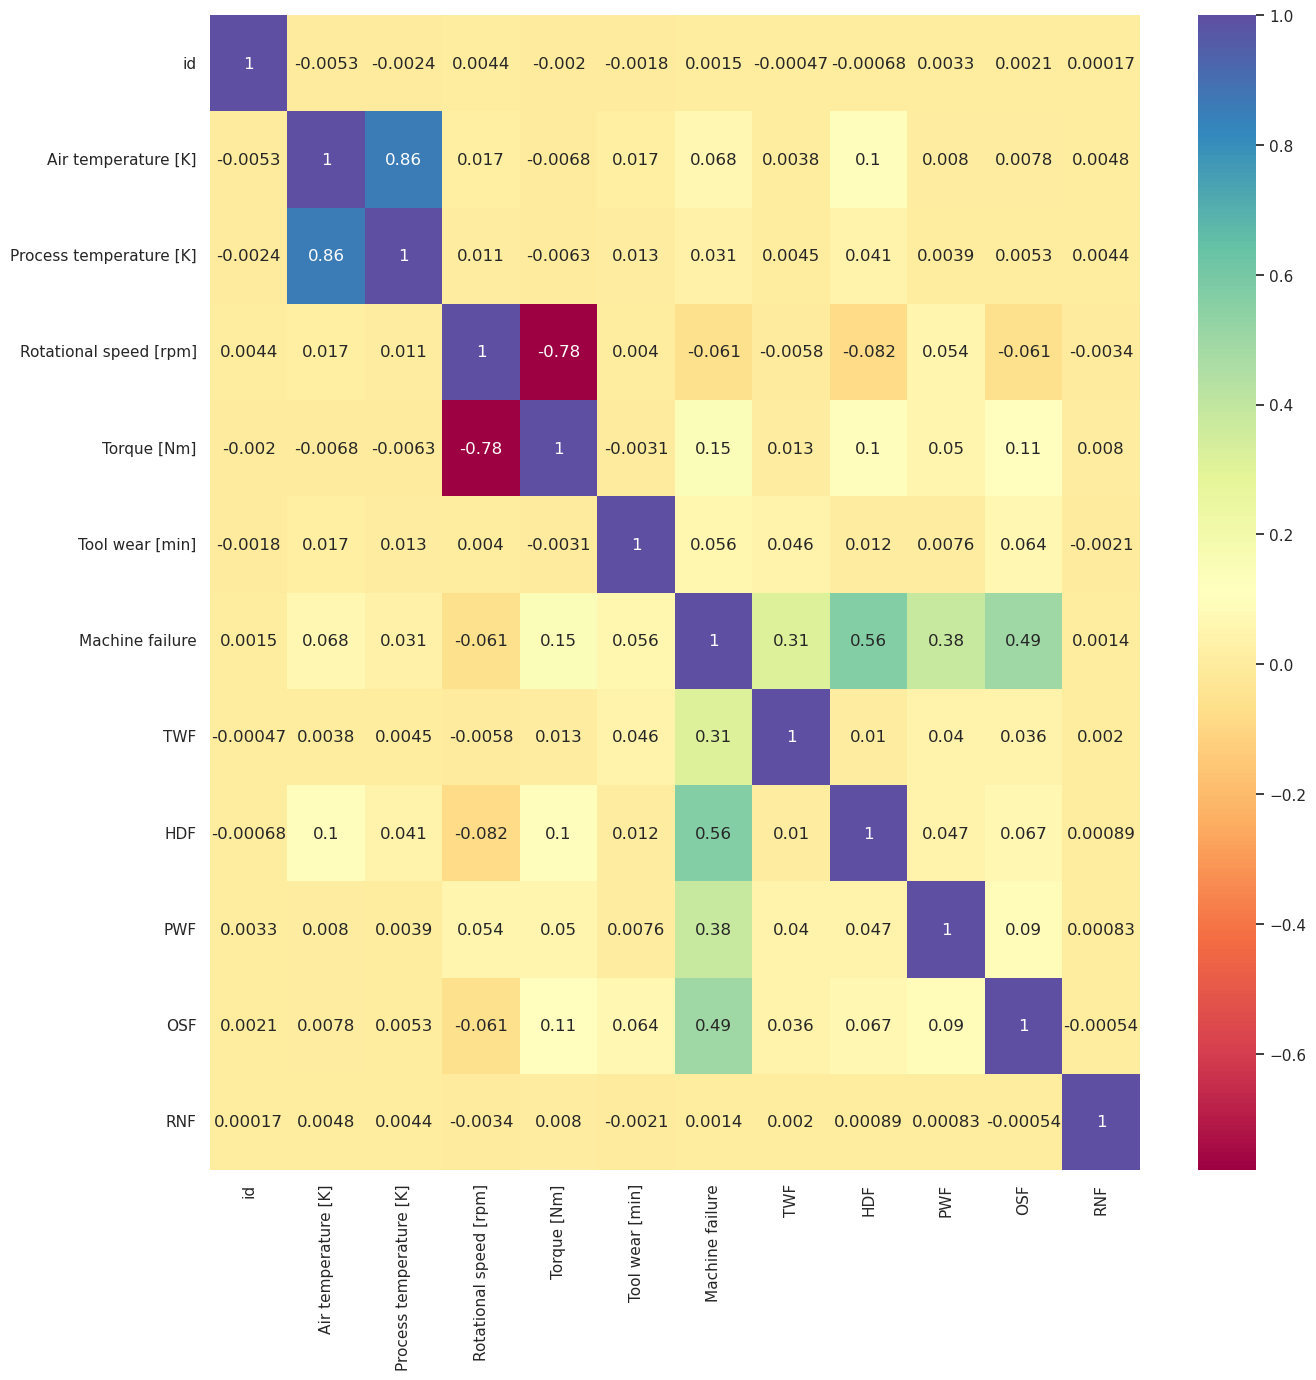


  Spearman Correlation Coefficient of metric variables of the dataframe (bivariate): 

                               id  Air temperature [K]  \
id                       1.000000            -0.004987   
Air temperature [K]     -0.004987             1.000000   
Process temperature [K] -0.002292             0.841687   
Rotational speed [rpm]   0.003454             0.005514   
Torque [Nm]             -0.002105            -0.003353   
Tool wear [min]         -0.001916             0.015654   
Machine failure          0.001500             0.066817   
TWF                     -0.000475             0.003813   
HDF                     -0.000680             0.099014   
PWF                      0.003275             0.007871   
OSF                      0.002114             0.007585   
RNF                      0.000175             0.005276   

                         Process temperature [K]  Rotational speed [rpm]  \
id                                     -0.002292                0.003454   
Air t

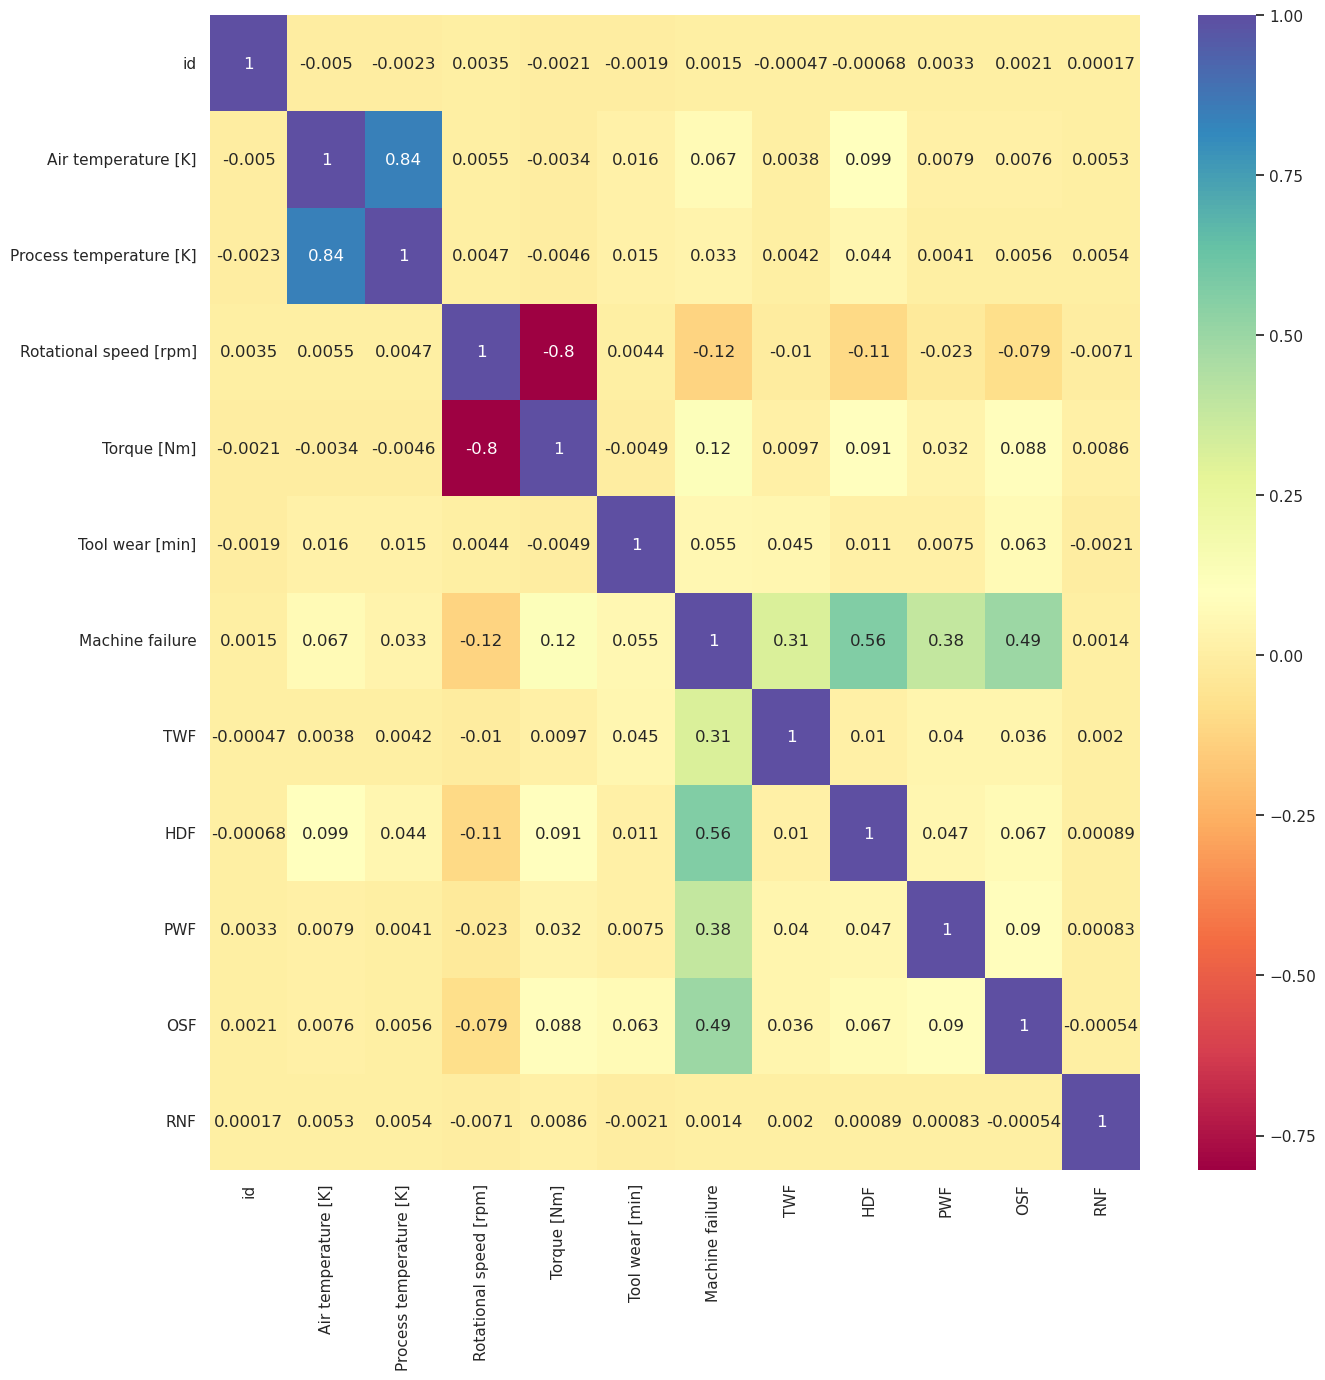

In [10]:
def EDA(training_data):  
  # Print the "shape" of the dataframe
  print("\n" +'\033[1m','\033[94m',"Shape of the dataframe:",'\033[0m', training_data.shape, "\n")
    
  # Print the "head" of the dataframe
  print('\033[1m','\033[94m',"Head of the dataframe:",'\033[0m', "\n")
  print(training_data.head())
  
  # Print the "general information" of the dataframe
  print("\n", '\033[1m','\033[94m',"General information of the dataframe:",'\033[0m', "\n")
  training_data.info()
 
  # Print the "number and percentage" of missing values per column" of the dataframe
  print("\n" +'\033[1m','\033[94m', "Number and percentage of missing values per column of the dataframe:", '\033[0m' + "\n")
  missing = training_data.isnull().sum()
  percent = missing / training_data.shape[0] * 100
  print(pd.concat([missing, percent], axis=1, keys=["Missing", "Percent"]))

  # Print the "summary statistics" of metric variables of the dataframe
  print("\n" +'\033[1m','\033[94m', "Summary statistics of metric variables of the dataframe:", '\033[0m' + "\n")
  print(training_data.describe())  
  
  # Print the "count of nonmetric variables" of the dataframe
  print("\n" +'\033[1m','\033[94m', "Count of nonmetric variables of the dataframe:", '\033[0m' + "\n")
  print(training_data_nonmetric.value_counts())  
    
  # Plot "histograms" of metric variables of the dataframe (univariate)
  print("\n" +'\033[1m','\033[94m',"Histograms of metric variables of the dataframe (univariate):", '\033[0m' + "\n")
  training_data.hist(bins= 50, figsize=(20,20),color= "Crimson")
  plt.show()  
    
  # Plot "boxplots" of metric variables of the dataframe
  print("\n" +'\033[1m','\033[94m',"Boxplots of metric variables of the dataframe:", '\033[0m' + "\n")
  training_data.boxplot(figsize=(20,20), rot=90, color= "Crimson")
  plt.show()
    
  # Print the "Standard Correlation Coefficient (also called, "Pearson's Correlation Coefficient") of metric variables of the dataframe (bivariate)
  print("\n" +'\033[1m','\033[94m', "Standard Correlation Coefficient of metric variables of the dataframe (bivariate):", '\033[0m' + "\n")
  print(training_data_metric.corr())    
    
  # Plot "heatmap of the Standard Correlation Coefficient (also called, "Pearson's Correlation Coefficient") of metric of the dataframe (bivariate)
  print("\n" +'\033[1m','\033[94m', "Correlation matrix of metric variables of the dataframe (bivariate):", '\033[0m' + "\n")
  corr = training_data_metric.corr()
  sns.set(rc={"figure.figsize":(15, 15)})
  sns.heatmap(corr, annot = True, cmap="Spectral")
  plt.show()  

  # Print the "Spearman Correlation Coefficient" of metric variables of the dataframe (bivariate)
  print("\n" +'\033[1m','\033[94m', "Spearman Correlation Coefficient of metric variables of the dataframe (bivariate):", '\033[0m' + "\n")
  print(training_data_metric.corr(method="spearman"))    

  # Plot "heatmap" of the "Spearman Correlation Coefficient" of metric variables of the dataframe (bivariate)
  print("\n" +'\033[1m','\033[94m', "Spearman Correlation matrix of metric variables of the dataframe (bivariate):", '\033[0m' + "\n")
  corr = training_data_metric.corr(method="spearman")
  sns.set(rc={"figure.figsize":(15, 15)})
  sns.heatmap(corr, annot = True, cmap="Spectral")
  plt.show()

# Call the function
EDA(training_data)

# __4. Prepare the Data (PD) - Training Dataset__

Data cleaning (outliers / null)
feature scaling (standard, normalization)
Feature transformation (log,exp,..)
Feature engineering (new variables / combination)
encoding (categorical)

## <span style="color:red"> ***Unfinished Notebook - I am still workingon on it!***</span>

# __References__

1. **Hands-on Machine Learning with Scikit Learn, Keras and TensorFlow (Second Edition)**
> Aurélien Gerón